In [1]:
import torch

In [35]:
from torch import Tensor

### 生成 tensor

In [37]:
x = torch.empty(5, 3)  # 空 tensor ,返回值为 内存中的 原来的值
x = torch.rand(5, 3)  # 均匀分布
x = torch.zeros(5, 3, dtype=torch.long)   # 0值
x = torch.tensor([5.5, 3])  # 指定值

In [3]:
torch.randint(high=4, size=(10,))

tensor([0, 2, 0, 3, 3, 0, 2, 3, 1, 2])

In [51]:
# 根据已知张量属性 构造张量
y = x.new_ones(5, 3, dtype=torch.double)  
print(y)
z = torch.randn_like(x, dtype=torch.float)  
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([-0.1577, -0.3356])


In [52]:
?x.size

In [54]:
y.numel()

15

In [62]:
a = torch.tensor([1])

In [57]:
a.shape

torch.Size([])

In [58]:
a.dim()

0

In [73]:
torch.tensor(1).numpy()

array(1)

In [63]:
a.data

tensor([1])

In [70]:
torch.Tensor(2,3)       # 创建 2 * 3 的 tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [74]:
torch.randperm(5)

tensor([0, 2, 1, 3, 4])

In [76]:
torch.Tensor([1,2])

tensor([1., 2.])

In [66]:
a=torch.randint(low=0,high=10,size=(10,1))
print(a)
b=torch.clamp(a,3,6)
print(b)

tensor([[7],
        [1],
        [8],
        [6],
        [9],
        [6],
        [0],
        [0],
        [1],
        [1]])
tensor([[6],
        [3],
        [6],
        [6],
        [6],
        [6],
        [3],
        [3],
        [3],
        [3]])


In [69]:
?torch.rand

In [114]:
?x.clamp

### 运算

In [77]:
y = torch.rand(5, 3)
x = torch.rand(5, 3)
z = x + y  # 形式1
print(z)

tensor([[0.6331, 0.8670, 0.8715],
        [0.2383, 0.5577, 0.9472],
        [1.2216, 1.0452, 1.5581],
        [1.8132, 1.2558, 0.5962],
        [0.8491, 0.8041, 0.9586]])


In [9]:
z = torch.add(x, y)  # 形式2
print(z)

tensor([[1.0413, 0.4901, 0.6000],
        [0.7321, 0.3954, 1.1616],
        [1.1577, 0.9836, 1.1727],
        [1.5516, 1.2782, 1.0103],
        [1.0295, 0.3853, 0.6362]])


In [10]:
result = torch.empty(5, 3)
print(torch.add(x, y, out=result))  # 形式3
print(result)

tensor([[1.0413, 0.4901, 0.6000],
        [0.7321, 0.3954, 1.1616],
        [1.1577, 0.9836, 1.1727],
        [1.5516, 1.2782, 1.0103],
        [1.0295, 0.3853, 0.6362]])
tensor([[1.0413, 0.4901, 0.6000],
        [0.7321, 0.3954, 1.1616],
        [1.1577, 0.9836, 1.1727],
        [1.5516, 1.2782, 1.0103],
        [1.0295, 0.3853, 0.6362]])


In [11]:
y.add_(x)  # 形式4 in-place操作都加_。例如x.copy_(y)、x.t_()将更改x
print(y)

tensor([[1.0413, 0.4901, 0.6000],
        [0.7321, 0.3954, 1.1616],
        [1.1577, 0.9836, 1.1727],
        [1.5516, 1.2782, 1.0103],
        [1.0295, 0.3853, 0.6362]])


In [12]:
# reshape 通过 view 实现
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())  # torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
# 获取单元素内容 标量
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.4079])
-0.4079459011554718


### 配合nunpy
Torch张量和NumPy数组将共享它们的底层内存位置，因此当一个改变时,另外也会改变

In [14]:
a = torch.ones(5)
b = a.numpy()
a.add_(1)
print(a)  # tensor([2., 2., 2., 2., 2.])
print(b)  # [2. 2. 2. 2. 2.]  # type(b)==numpy.ndarray

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [130]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
np.add(a, 1, out=a)
print(a)  # [2. 2. 2. 2. 2.]
print(b)  # tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
print(c)  # tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


### 使用GPU


In [16]:
if torch.cuda.is_available():  # 判断GPU可用
device = torch.device("cuda")          # a CUDA device object
y = torch.ones_like(x, device=device)  # 直接在GPU上创建tensor
x = x.to(device)                       # 或者使用`.to("cuda")`方法
z = x + y
print(z)
print(z.to("cpu", torch.double))       # `.to`也能在移动时改变dtype

### 自动求导

- torch.Tensor 是核心类。如果它的属性 **.requires_grad** 为 True，那么它将会追踪对于该张量的所有操作。
- 当完成计算后可以通过调用 .backward()，来自动计算所有的梯度， 并累加到.grad属性.
- 要阻止一个张量被跟踪历史，可以调用 .detach() 方法，
- 将代码块包装在 with torch.no_grad(): 中可以防止跟踪历史记录(和使用内存）。在评估模型/预测时特别有用，我们不需要在此过程中对他们进行梯度计算
- 每个张量都有一个 .grad_fn 属性，该属性引用了创建 Tensor 自身的Function，Tensor 和 Function 互相连接生成了一个无圈图(acyclic graph)


In [115]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y.grad_fn)  # <AddBackward0 object at 0x7fe836057c10>

z = y * y * 3
out = z.mean()
print(z, out)

# x.requires_grad_(False)  # 原地该表 requires_grad

# 标量反向传播
out.backward() # 标量， 等价 out.backward(torch.tensor(1.))
print(x.grad)  # d(out)/dx

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [18]:
# 向量反向传播
x = torch.ones(3, requires_grad=True)
y = x * 2  # dy/dx=2

In [19]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)  # 用来表示 d(out)/d(y) 是个向量
y.backward(v)  # 从y的位置向前求导，初始值为v  
print(x.grad)  # d(out)/d(x) = d(out)/d(y) * d(y)/d(x) = v * 2

tensor([2.0000e-01, 2.0000e+00, 2.0000e-04])


### 前馈神经网络


- torch.Tensor - 一个多维数组，支持诸如backward()等的自动求导操作，同时也保存了张量的梯度。
- nn.Module - 神经网络模块。是一种方便封装参数的方式，具有将参数移动到GPU、导出、加载等功能。
- nn.Parameter - 张量的一种，当它作为一个属性分配给一个Module时，它会被自动注册为一个参数。
- autograd.Function - 实现了自动求导前向和反向传播的定义，每个Tensor至少创建一个Function节点，该节点连接到创建Tensor的函数并对其历史进行编码。

- 整个torch.nn包只支持小批量处理(mini-batches），不支持单个样本的输入。
- 如果是一个单独的样本，只需要使用input.unsqueeze(0)来添加一个“假的”批大小维度。


In [150]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):  # 著名的leNet

    def __init__(self):
        super(LeNet, self).__init__()
        # 卷积层 输入图像channel：1；输出channel：6；5x5卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):  # forward 函数中使用任何针对张量的操作和计算。
        # 2x2 Max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))  
        # 如果是方阵,则可以只使用一个数字进行定义
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 除去批处理维度的其他所有维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [151]:
# 查看参数
params = list(net.parameters())  # 网络自己生成参数 返回的是generator
print(len(params))  # 10 个 高维参数 需要学习
param = params[0]  # 第一层参数 torch.nn.parameter.Parameter
print(param.size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [152]:
x = torch.randn(1, 1, 32, 32)  # 1张 深度为1 的 32*32图片
out = net(x)
print(out)

tensor([[-0.1002, -0.1569, -0.0590,  0.0726, -0.0770,  0.0780,  0.0739, -0.0718,
         -0.1261, -0.0207]], grad_fn=<AddmmBackward>)


In [154]:
# 清零所有参数的梯度缓存，然后进行随机梯度的反向传播
net.zero_grad()
out.backward(torch.randn(1, 10))

### 反向传播

- 一个损失函数接受一对(output, target)作为输入，计算一个值来估计网络的输出和目标值相差多少。
- nn包中有很多不同的损失函数，如nn.MSELoss

In [24]:
output = net(x)  # 计算前馈
target = torch.randn(10)  # 本例子中使用模拟数据
target = target.view(1, -1)  # 使目标值与数据值尺寸一致
criterion = nn.MSELoss()

loss = criterion(output, target)  # 计算损失
print(loss)

tensor(1.0454, grad_fn=<MseLossBackward>)


In [157]:
x.grad_fn

In [25]:
# 当我们调用loss.backward()，整张图开始关于loss微分，所有设置了requires_grad=True的张量的.grad属性累积着梯度张量

In [26]:
print(loss.grad_fn)  # MSELoss <MseLossBackward object at 0x7fe83612cf40>
print(loss.grad_fn.next_functions[0][0])  # Linear <AddmmBackward object at 0x7fe83612cb80>
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU <AccumulateGrad object at 0x7fe83612cf40>
print(loss.grad_fn.next_functions)

((<AddmmBackward object at 0x7f99695165e0>, 0), (None, 0))


In [155]:
loss.grad_fn.next_functions

((<AddmmBackward at 0x7f996b363550>, 0), (None, 0))

In [159]:
type(loss.grad_fn)

MseLossBackward

In [27]:
net.zero_grad() # 清零所有参数(parameter）的梯度缓存

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)  # tensor([0., 0., 0., 0., 0., 0.])

loss.backward()  # 计算梯度

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)  # tensor([ 0.0046,  0.0067, -0.0057, -0.0045, -0.0039, -0.0017])

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0234, -0.0100, -0.0056, -0.0039, -0.0018,  0.0050])


In [28]:
#  手动更新 梯度
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [122]:
a = list(net.parameters())

In [125]:
type(a[0])

torch.nn.parameter.Parameter

In [29]:
#  自动更新权重
import torch.optim as optim

# 创建优化器(optimizer）
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练的迭代中：
optimizer.zero_grad()   # 清零梯度缓存
output = net(x)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # 更新参数

### 输入数据处理

- 使用python标准库将数据加载到numpy数组里。然后将这个数组转化成torch.*Tensor

- 对于图片，有Pillow，OpenCV等包可以使用
- 对于音频，有scipy和librosa等包可以使用
- 对于文本，不管是原生python的或者是基于Cython的文本，可以使用NLTK和SpaCy

- torchvision 包含图片数据，Imagenet、CIFAR10、MNIST等常用数据集的数据加载器(data loaders）和转换操作

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


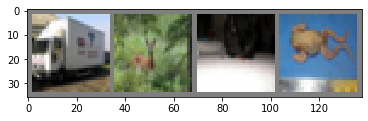

truck  deer   cat  frog


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 输出图像的函数
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 随机获取训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 整体

[1,  2000] loss: 2.146
[1,  4000] loss: 1.802
[1,  6000] loss: 1.669
[1,  8000] loss: 1.587
[1, 10000] loss: 1.523
[1, 12000] loss: 1.491
[2,  2000] loss: 1.412
[2,  4000] loss: 1.375
[2,  6000] loss: 1.378
[2,  8000] loss: 1.320
[2, 10000] loss: 1.317
[2, 12000] loss: 1.283
Finished Training


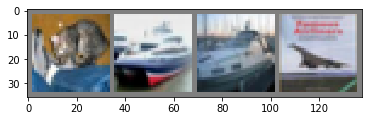

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 55 %
Accuracy of plane : 69 %
Accuracy of   car : 59 %
Accuracy of  bird : 40 %
Accuracy of   cat : 49 %
Accuracy of  deer : 49 %
Accuracy of   dog : 41 %
Accuracy of  frog : 57 %
Accuracy of horse : 61 %
Accuracy of  ship : 55 %
Accuracy of truck : 67 %


In [30]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 定义卷积神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 训练网络
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()  # 每次开始前都 置成0， 否则 optimizer.step()就加重复了
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# 保存模型
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# 预测数据
dataiter = iter(testloader)
images, labels = dataiter.next() # 取一条

# 展示图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 加载保存的模型
net = Net()
net.load_state_dict(torch.load(PATH))

# 预测 一张图
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

# 预测全部test数据
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


# 计算各个类别的正确率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [31]:
# 设定设备 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)  # 递归遍历其下面的所有模块 送入 divice
inputs, labels = inputs.to(device), labels.to(device)  # 输入输出也送入device

# 并行的话 使用 nn.DataParallel(Model) 自动的划分数据，并将作业顺序发送到多个GPU上的多个模型。
# DataParallel会在每个模型完成作业后，收集与合并结果然后返回给你。

cpu
